In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

### Prepare Data
wrangle function & subseting the Data


In [82]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Step 1: Filter for Capital Federal, apartments, price under 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]
    
    # Step 2: Now calculate area mask on the filtered df
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]
    
    return df

Using wrangle function to create a DataFrame df from CSV file

In [83]:
df = wrangle("data/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [84]:
mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
df[mask_ba].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


### Explore 

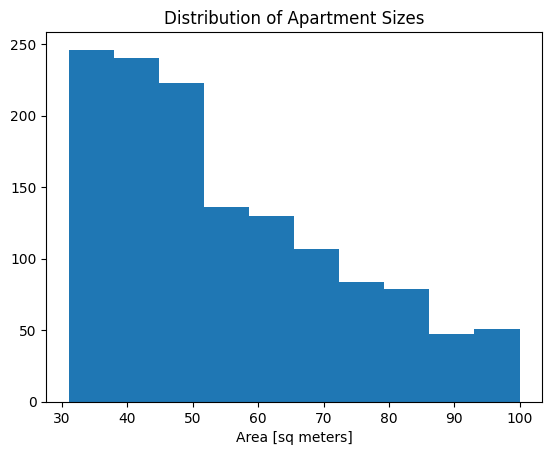

In [85]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

In [86]:
df.describe()["surface_covered_in_m2"]

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

### Removing Outliers

In [87]:
low, high = df["surface_covered_in_m2"].quantile([0.1,0.9])
mask_area = df["surface_covered_in_m2"].between(low,high)
mask_area.head()

4     True
9     True
29    True
40    True
41    True
Name: surface_covered_in_m2, dtype: bool

### Price vs Area scattor plot

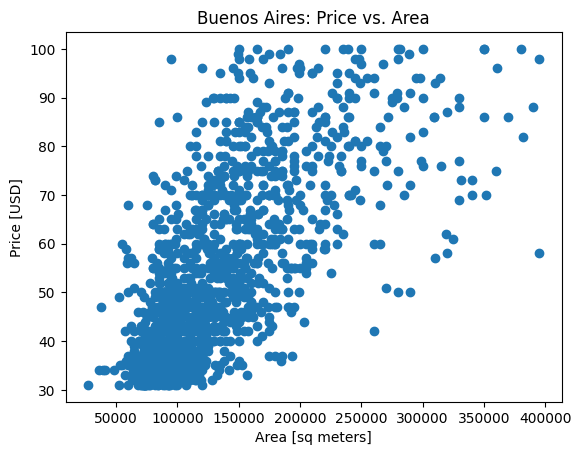

In [88]:
plt.scatter(x =df["price_aprox_usd"], y = df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area");

### Split Data: Feature matrix

In [89]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1343, 1)

### Split Data: Target Vector

In [90]:
target = "price_aprox_usd"
y_train = df[target]

### Build model

#### Baseline: Calculate Mean

In [91]:
y_mean = y_train.mean()
print(y_mean.round())

135528.0


### Baseline: Prediction list

In [92]:
y_pred_baseline = [y_mean.round()] * len(y_train)
y_pred_baseline[:5]

[135528.0, 135528.0, 135528.0, 135528.0, 135528.0]

In [94]:
len(y_pred_baseline) ==len(y_train)


True

### Baseline: Scatorplot

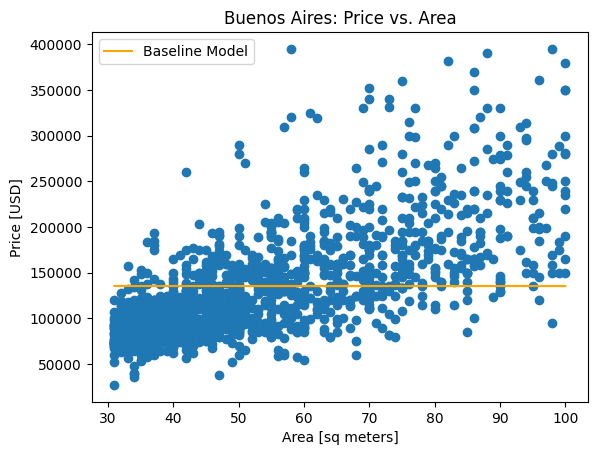

In [95]:
# Add a line to the plot
plt.plot(X_train, y_pred_baseline, color= "orange", label = "Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

### Baseline: Mean absolute error

In [96]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.49


### Instantiate Model

In [97]:
model = LinearRegression()

#### Train model

In [98]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Evaluate: Generate Predictions

In [99]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

### Training mean absolute error

In [100]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


### Testing model using test data

In [101]:

y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/buenos-aires-test-features.csv'

### Extract Model intercepts

In [102]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)

Model Intercept: 11433.31


### Extract model coefficients

In [104]:
coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)

Model coefficient for "surface_covered_in_m2": 2253.12


### Generate Equations

In [105]:
print(f"apartment_price = {intercept} + {coefficient} * surface_covered") 

apartment_price = 11433.31 + 2253.12 * surface_covered


### Model ploting

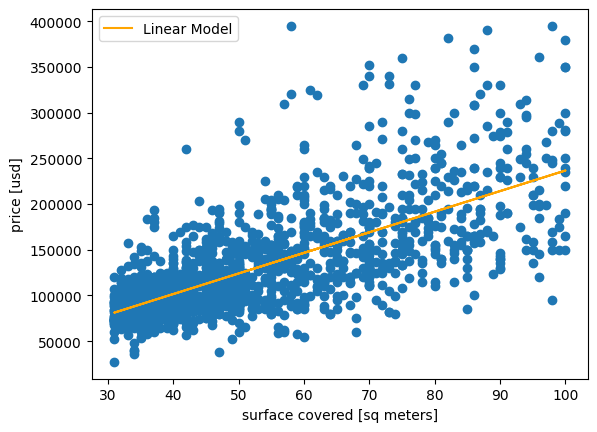

In [106]:
# Add a line to the plot
plt.plot(X_train, model.predict(X_train), color = "Orange", label= "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();